# Exercise 6
# Problem 1 :Clustering using GrLivArea and GarageArea

In [86]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [87]:
houseData = pd.read_csv('train.csv')

a) Extract the two variables in consideration from the dataset

X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])

In [88]:
X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])

b) Visualize the 2D distribution of the two variables extracted above, using a standard scatter plot.

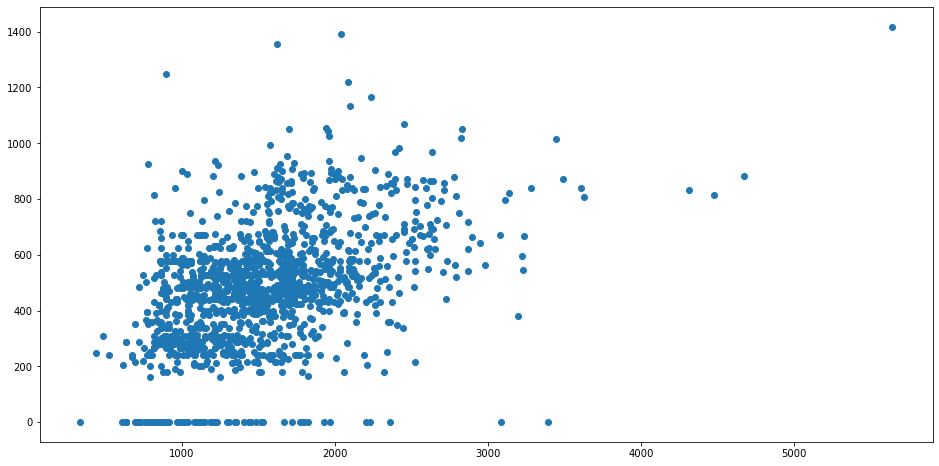

In [89]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", data = X)

c) Import k-Means Clustering model from Scikit-Learn : from sklearn.cluster import KMeans

In [90]:
from sklearn.cluster import KMeans

d) Guess the number of clusters from the 2D scatterplot, and perform k-Means clustering with that.

In [91]:
num_clust = 3

kmeans = KMeans(n_clusters = num_clust)

kmeans.fit(X)

KMeans(n_clusters=3)

e) Print the cluster centers, view their countplot, and visualize the clusters on the 2D scatterplot.

In [92]:
print("Features", "\tGrLivArea", "\tGarageArea")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster",i, end=":\t")
    for coord in center:
        print(round(coord, 2), end=" \t")
    print()

Features 	GrLivArea 	GarageArea

Cluster 0:	1088.15 	375.58 	
Cluster 1:	2567.36 	677.88 	
Cluster 2:	1697.64 	522.93 	


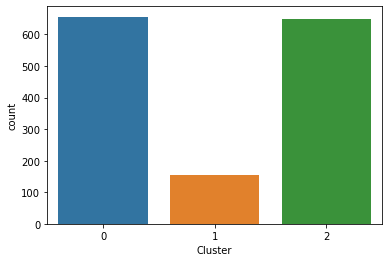

In [93]:
labels = kmeans.predict(X)

X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

sb.countplot(X_labeled["Cluster"])

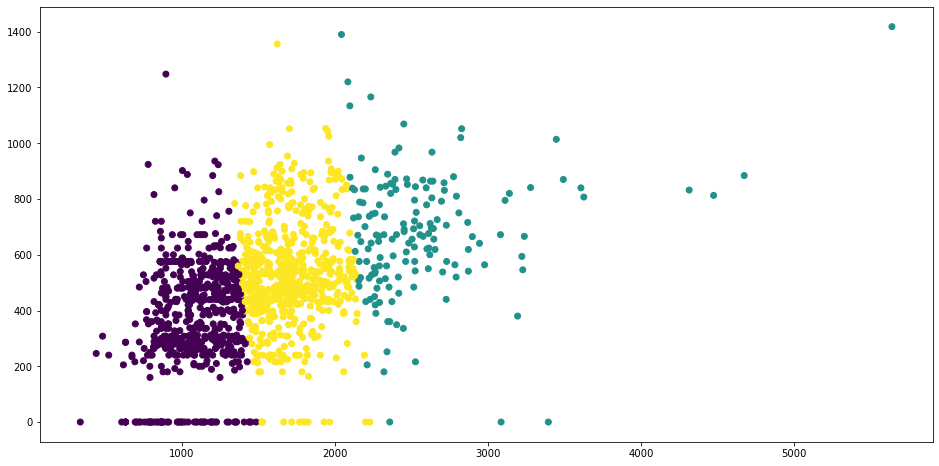

In [94]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Cluster", cmap = 'viridis', data = X_labeled)

# Problem 2 : Anomaly Detection with the same Variables

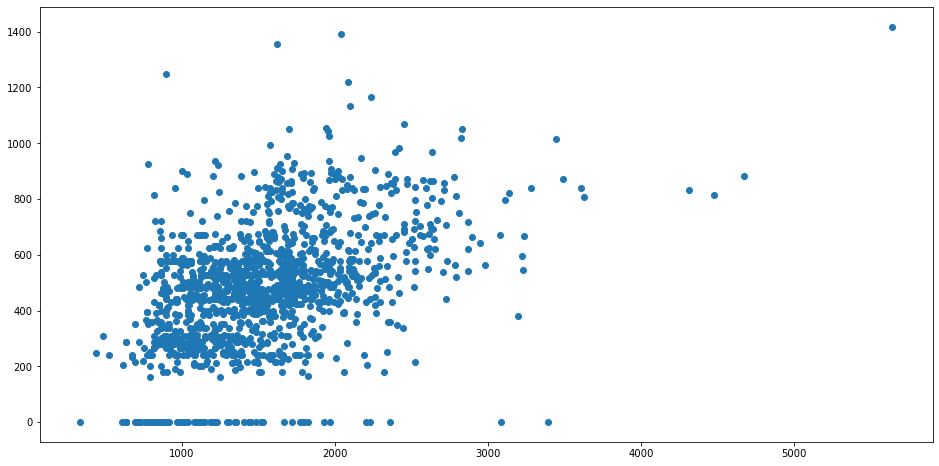

In [95]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", data = X)

c) Import Anomaly model from Scikit-Learn : from sklearn.neighbors import LocalOutlierFactor

In [96]:
from sklearn.neighbors import LocalOutlierFactor

d) Guess the parameters from the 2D scatterplot, and perform Anomaly Detection with those parameters.

In [139]:
num_neighbors = 35
cont_fraction = 0.025

lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

lof.fit(X)

LocalOutlierFactor(contamination=0.025, n_neighbors=35)

e) View their countplot of Anomalies vs Normal Data, and visualize the anomalies on the 2D scatterplot.

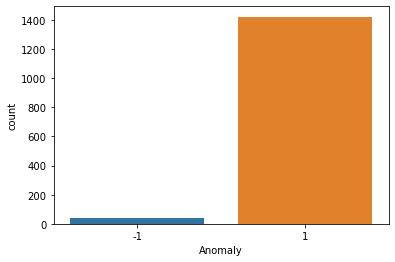

In [140]:
labels = lof.fit_predict(X)

X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

sb.countplot(X_labeled["Anomaly"])

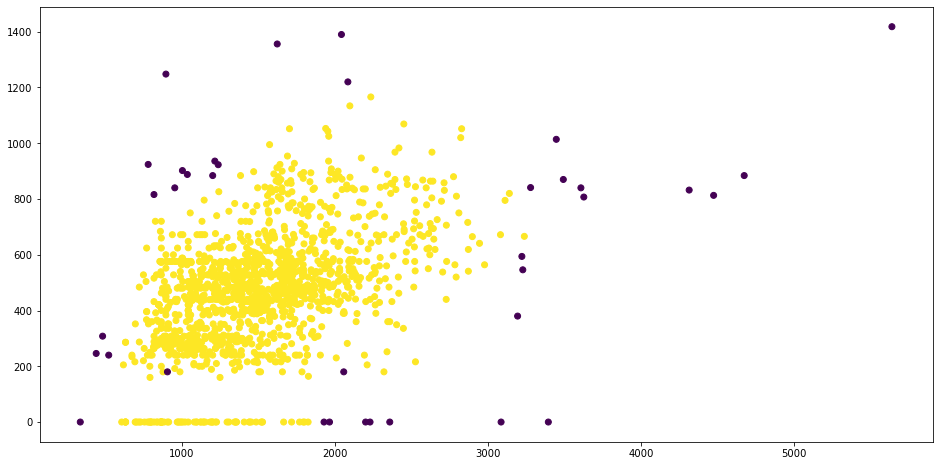

In [141]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Anomaly", cmap = 'viridis', data = X_labeled)